### 1. Load packages and data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.stats import shapiro
import warnings
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import wget

In [244]:
data= "https://raw.githubusercontent.com/ColombiaMRP/Capstone-project-1/main/Data/kc_house_data.csv"
data= wget.download(data)
df= pd.read_csv(data)

### 2. Data Wrangling and Exploration

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 2.1 Visual exploration over some variables

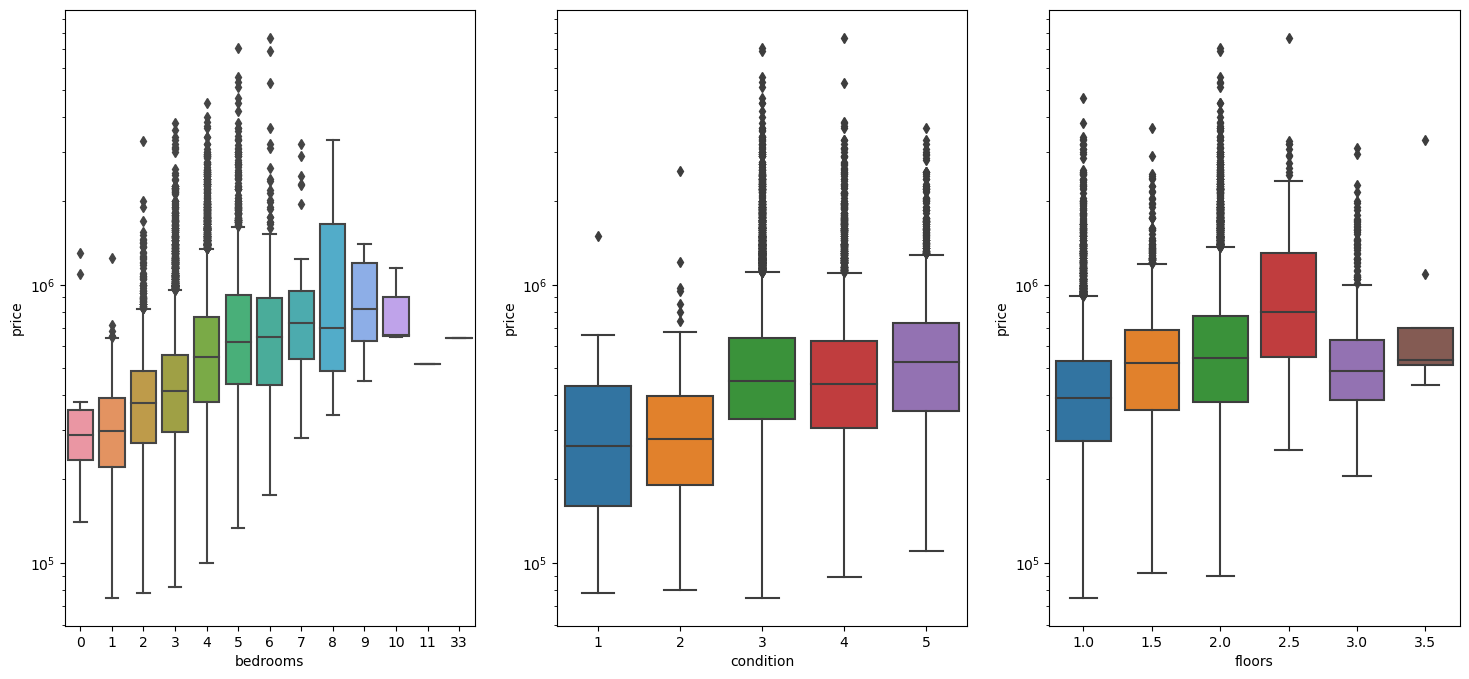

In [74]:
fig, ax=plt.subplots(1,3, figsize=(18,8))
sns.boxplot(y='price', x='bedrooms', data=df, ax=ax[0]).set_yscale('log')
sns.boxplot(y='price', x ='condition', data = df, ax=ax[1]).set_yscale('log')
sns.boxplot(y='price', x='floors', data=df, ax=ax[2]).set_yscale('log')

(0.0, 8081250.0)

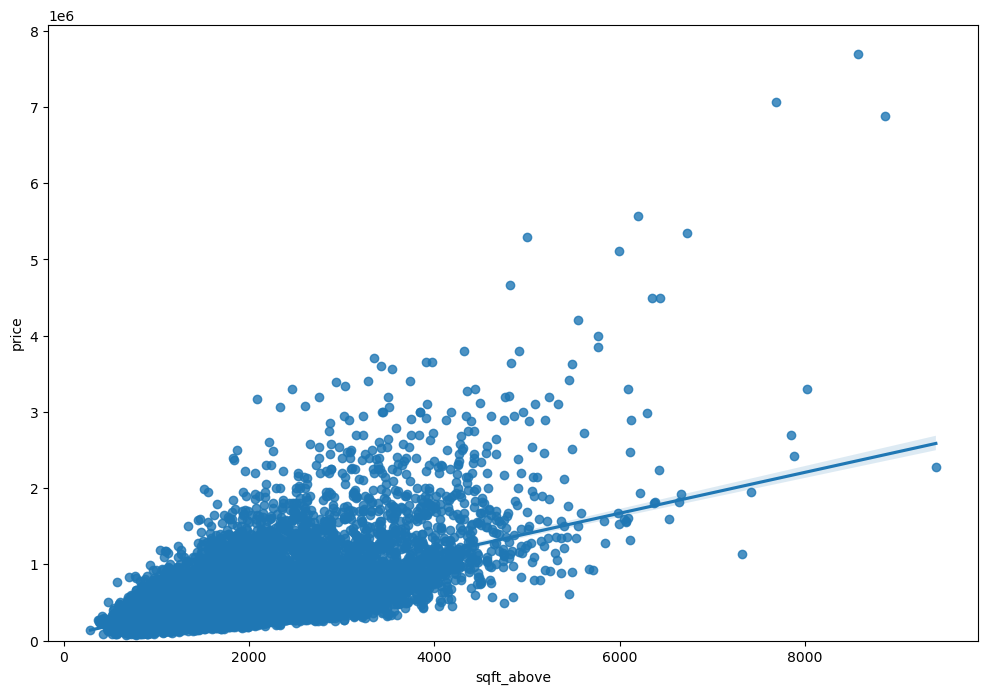

In [75]:
plt.figure(figsize = (12,8))
sns.regplot(x='sqft_above', y='price', data=df)
plt.ylim(0,)

In [79]:
df.corr()['price'].sort_values().to_frame()

C:\Users\Asus\AppData\Local\Temp\ipykernel_9124\4029555510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values().to_frame()


,price
zipcode,-0.053203
id,-0.016762
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369


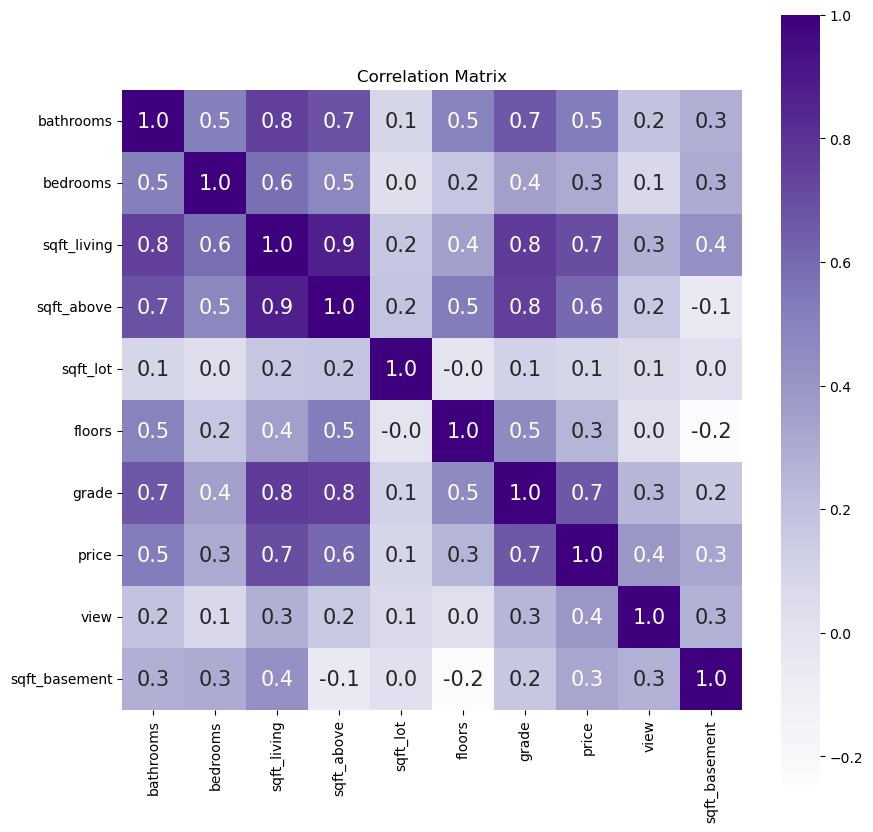

In [88]:
corr = df[['bathrooms', 'bedrooms', 'sqft_living','sqft_above', 'sqft_lot', 'floors', 'grade', 'price','view','sqft_basement']]
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True, cmap='Purples', cbar=True, square= True, fmt='.1f', annot_kws={'size':15})
plt.show()

### 2.2 Normality and box-cox correction

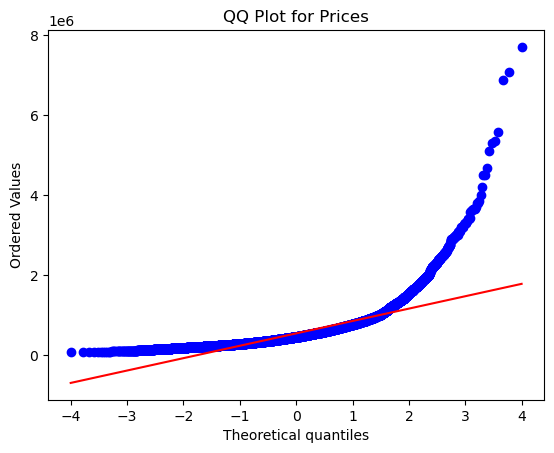

In [19]:
## QQ plot of price
stats.probplot(x=df['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Prices")
plt.show()

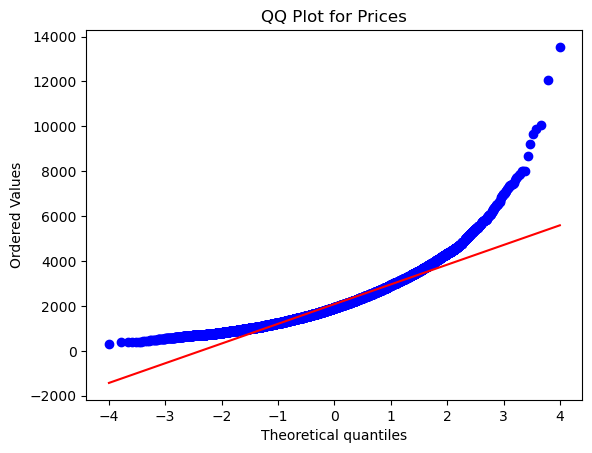

In [23]:
## QQ plot of sqft_living
stats.probplot(x=df['sqft_living'], dist = "norm", plot = plt)
plt.title("QQ Plot for Prices")
plt.show()

In [61]:
warnings.filterwarnings("ignore")

Normalidad = pd.DataFrame(columns=["Variable", "Stat", "P-value", "Normal","Box-cox"])
v_numeric = [x for x in df.columns if x != "date"]
constant=1000

# Iterar sobre las variables
for variable in v_numeric:
    stat, p_value = shapiro(df[variable])
    normal = "Sí" if p_value > 0.05 else "No"
    transformed_variable, lambda_variable = stats.boxcox(df[variable]+constant)
    Normalidad = Normalidad.append({
        "Variable": variable,
        "Stat": stat,
        "P-value": p_value,
        "Normal": normal,
        "Box-cox": lambda_variable
    }, ignore_index=True)
print(Normalidad)

warnings.resetwarnings()

         Variable      Stat  P-value Normal      Box-cox
0              id  0.934961      0.0     No     0.563129
1           price  0.712014      0.0     No    -0.236936
2        bedrooms  0.848950      0.0     No  -183.859421
3       bathrooms  0.936810      0.0     No  -398.689981
4     sqft_living  0.914984      0.0     No    -0.472630
5        sqft_lot  0.232919      0.0     No    -0.368179
6          floors  0.750754      0.0     No -1445.650536
7      waterfront  0.057854      0.0     No -1855.397767
8            view  0.339704      0.0     No -1855.397767
9       condition  0.697615      0.0     No -1618.970112
10          grade  0.895204      0.0     No  -440.525684
11     sqft_above  0.893650      0.0     No    -0.941459
12  sqft_basement  0.709731      0.0     No    -3.197003
13       yr_built  0.954408      0.0     No    25.605137
14   yr_renovated  0.201064      0.0     No   -21.551642
15        zipcode  0.943372      0.0     No -1054.300678
16            lat  0.956599    

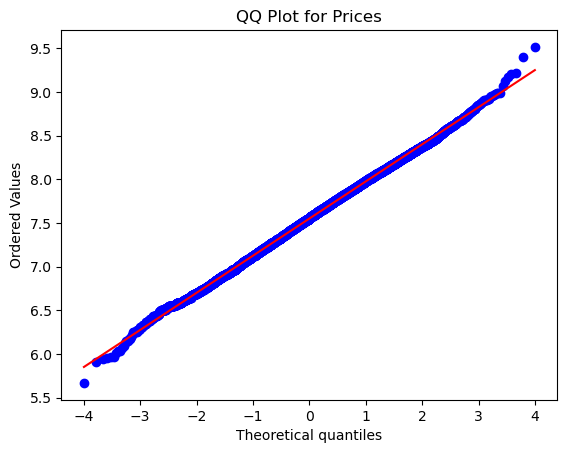

In [66]:
# proof of normality after corrections - aplying log() over sqft_living
stats.probplot(x=np.log(df["sqft_living"]), dist="norm", plot=plt)
plt.title("QQ Plot for Prices")
plt.show()

In [6]:
# transformed variables usage

def normal_tranformation(df):
    lambda_features=["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15","price"]
    transformed_variables = {}
    lambda_variables = {}
    constant=1000

    for a in lambda_features:
        transformed_variables[a], lambda_variables[a] = stats.boxcox(df[a]+constant)

    for key, values in transformed_variables.items():
        new_column_name = f"{key}_boxcox"
        df = df.assign(**{new_column_name: values})
    
    return df

df=normal_tranformation(df)

### 3. Feature importance

##### 3.1 Diff and risk ratio

In [7]:
categorical = ["yr_renovated","yr_built","grade","condition","view","waterfront","floors","bathrooms","bedrooms"]
numerical =['sqft_living_boxcox','sqft_lot_boxcox', 'sqft_above_boxcox', 'sqft_basement_boxcox','sqft_living15_boxcox', 'sqft_lot15_boxcox']

In [125]:
for c in categorical:
    print(c)
    df_group = df.groupby(c).price.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - df.price.mean()
    df_group['risk'] = df_group['mean'] / df.price.mean()
    display(df_group)
    print()
    print()

yr_renovated


,mean,count,diff,risk
yr_renovated,,,,
0,530360.818155,20699,-9727.323611,0.981989
1934,459950.000000,1,-80138.141767,0.851620
1940,378400.000000,2,-161688.141767,0.700626
1944,521000.000000,1,-19088.141767,0.964657
1945,398666.666667,3,-141421.475100,0.738151
...,...,...,...,...
2011,607496.153846,13,67408.012080,1.124809
2012,625181.818182,11,85093.676415,1.157555
2013,664663.513514,37,124575.371747,1.230657




yr_built


,mean,count,diff,risk
yr_built,,,,
1900,581387.206897,87,41299.065130,1.076467
1901,556935.931034,29,16847.789268,1.031195
1902,673007.407407,27,132919.265641,1.246107
1903,480958.195652,46,-59129.946114,0.890518
1904,583756.644444,45,43668.502678,1.080854
...,...,...,...,...
2011,544522.000000,130,4433.858233,1.008210
2012,527447.335294,170,-12640.806472,0.976595
2013,678545.452736,201,138457.310970,1.256361




grade


,mean,count,diff,risk
grade,,,,
1,1.420000e+05,1,-3.980881e+05,0.262920
3,2.056667e+05,3,-3.344215e+05,0.380802
4,2.143810e+05,29,-3.257071e+05,0.396937
5,2.485240e+05,242,-2.915642e+05,0.460154
6,3.019196e+05,2038,-2.381685e+05,0.559019
7,4.025903e+05,8981,-1.374979e+05,0.745416
8,5.428528e+05,6068,2.764624e+03,1.005119
9,7.735132e+05,2615,2.334250e+05,1.432198
10,1.071771e+06,1134,5.316829e+05,1.984437




condition


,mean,count,diff,risk
condition,,,,
1,334431.666667,30,-205656.475100,0.619217
2,327287.145349,172,-212800.996418,0.605988
3,542012.578148,14031,1924.436382,1.003563
4,521200.390033,5679,-18887.751733,0.965028
5,612418.089359,1701,72329.947593,1.133922




view


,mean,count,diff,risk
view,,,,
0,4.965642e+05,19489,-43523.949658,0.919413
1,8.122808e+05,332,272192.695583,1.503978
2,7.924009e+05,963,252312.746084,1.467170
3,9.719653e+05,510,431877.132743,1.799642
4,1.463711e+06,319,923623.096478,2.710134




waterfront


,mean,count,diff,risk
waterfront,,,,
0,5.315636e+05,21450,-8.524542e+03,0.984216
1,1.661876e+06,163,1.121788e+06,3.077046




floors


,mean,count,diff,risk
floors,,,,
1.0,4.421806e+05,10680,-97907.509182,0.818719
1.5,5.589806e+05,1910,18892.501165,1.034980
2.0,6.488912e+05,8241,108803.021563,1.201454
2.5,1.060346e+06,161,520258.348917,1.963284
3.0,5.825260e+05,613,42437.897385,1.078576
3.5,9.333125e+05,8,393224.358233,1.728074




bathrooms


,mean,count,diff,risk
bathrooms,,,,
0.00,4.481600e+05,10,-9.192814e+04,0.829790
0.50,2.373750e+05,4,-3.027131e+05,0.439512
0.75,2.945209e+05,72,-2.455673e+05,0.545320
1.00,3.470412e+05,3852,-1.930469e+05,0.642564
1.25,6.212167e+05,9,8.112852e+04,1.150213
1.50,4.093222e+05,1446,-1.307659e+05,0.757880
1.75,4.548961e+05,3048,-8.519204e+04,0.842263
2.00,4.578897e+05,1930,-8.219842e+04,0.847806
2.25,5.336768e+05,2047,-6.411368e+03,0.988129




bedrooms


,mean,count,diff,risk
bedrooms,,,,
0,4.095038e+05,13,-130584.295613,0.758217
1,3.176429e+05,199,-222445.257344,0.588132
2,4.013727e+05,2760,-138715.459882,0.743161
3,4.662321e+05,9824,-73856.063285,0.863252
4,6.354195e+05,6882,95331.362447,1.176511
5,7.865998e+05,1601,246511.687090,1.456429
6,8.255206e+05,272,285432.494263,1.528492
7,9.511847e+05,38,411096.516128,1.761166
8,1.105077e+06,13,564988.781310,2.046105


##### 3.2 Mutual Information

In [128]:
from sklearn.metrics import mutual_info_score

In [129]:
def mutual_info_function_score(series):
    return mutual_info_score(series, df.price)

In [130]:
mi = df[categorical].apply(mutual_info_function_score)
mi.sort_values(ascending=False)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


yr_built        1.943687
bathrooms       0.742499
grade           0.623650
bedrooms        0.364072
floors          0.295291
condition       0.196618
yr_renovated    0.188993
view            0.185043
waterfront      0.026169
dtype: float64

In [150]:
from scipy.stats import ttest_ind, f_oneway

In [143]:
#condition

T, p = f_oneway(df[df['condition'] == 1]['price'],
                df[df['condition'] == 2]['price'],
                df[df['condition'] == 3]['price'],
                df[df['condition'] == 4]['price'],
                df[df['condition'] == 5]['price'])
T,p

(37.411540021423356, 3.116011341857883e-31)

In [147]:
#view

T, p = f_oneway(df[df['view'] == 1]['price'],
                df[df['view'] == 2]['price'],
                df[df['view'] == 3]['price'],
                df[df['view'] == 4]['price'],
                df[df['view'] == 0]['price'])

T,p

(1092.688222523648, 0.0)

In [153]:
#waterproof

group1 = df[df['waterfront'] == 0]['price']
group2 = df[df['waterfront'] == 1]['price']

# Prueba t para dos grupos
T, p = ttest_ind(group1, group2)
T,p

(-40.62589119977304, 0.0)

##### 3.3 Correlation 

In [154]:
df.corr()['price'].sort_values().to_frame()

C:\Users\Asus\AppData\Local\Temp\ipykernel_9124\2993901788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['price'].sort_values().to_frame()


,price
zipcode,-0.053203
id,-0.016762
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369


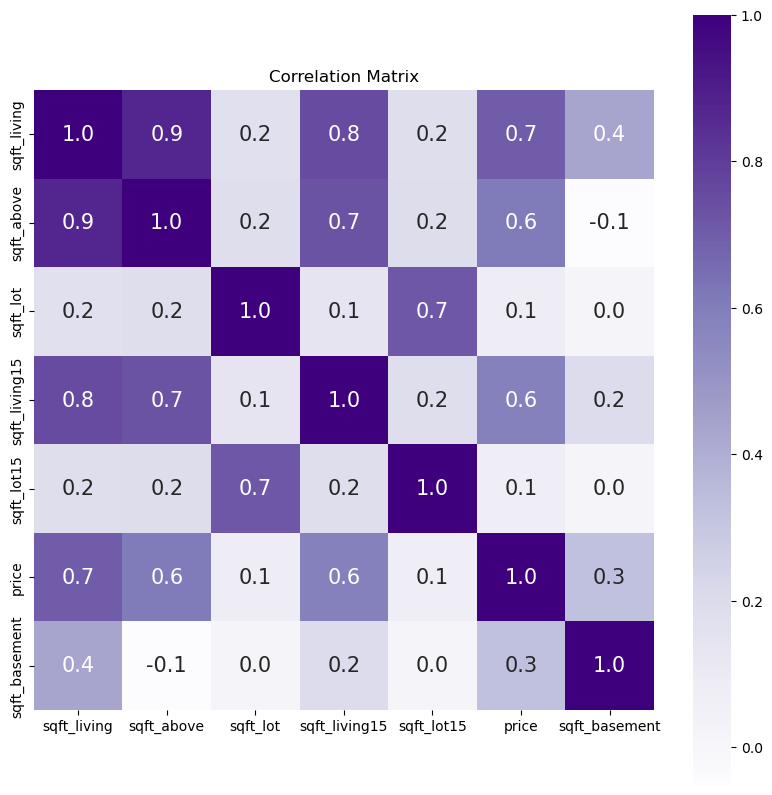

In [156]:
corr = df2[['sqft_living','sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price','sqft_basement']]
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True, cmap='Purples', cbar=True, square= True, fmt='.1f', annot_kws={'size':15})
plt.show()

In [157]:
from scipy.stats import pearsonr

In [159]:
# sqft_lot

corr_coef, p_value_pearson = pearsonr(df['sqft_lot'], df['price'])
corr_coef,p_value_pearson

(0.0896608605871001, 7.972504510431418e-40)

In [160]:
# sqft_lot15

corr_coef, p_value_pearson = pearsonr(df['sqft_lot15'], df['price'])
corr_coef,p_value_pearson

(0.08244715251948598, 6.417559889421439e-34)

In [161]:
# sqft_basement

corr_coef, p_value_pearson = pearsonr(df['sqft_basement'], df['price'])
corr_coef,p_value_pearson

(0.32381602071198384, 0.0)

### 4. Linear regression model

In [223]:
#definig rmse

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [16]:
# Defining relevant variables
features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built','lat', 'long', 'sqft_living_boxcox','sqft_lot_boxcox', 'sqft_above_boxcox', 'sqft_basement_boxcox','sqft_living15_boxcox', 'sqft_lot15_boxcox']
X = df[features]
Y = df['price_boxcox']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lm=LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

In [182]:
print("el valor del rmse es:",rmse(Y_test,Y_pred))
print("el valor del R2 es",lm.score(X_train,Y_train))

el valor del rmse es: 0.011596197652336323
el valor del R2 es 0.7612064628040132


In [17]:
# Using polinomial tranformations

pr = PolynomialFeatures()
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

In [180]:
lm=LinearRegression()
lm.fit(X_train_pr, Y_train)

Y_pred = lm.predict(X_test_pr)

print("Rmse:",rmse(Y_test,Y_pred))
print("Score:",lm.score(X_test_pr,Y_test))

el valor del rmse es: 0.010410933948428854
el valor del R2 es 0.807552689225628


### 5. Linear Regression with Rigid Regression

In [74]:
from sklearn.linear_model import Ridge

In [178]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(X_train_pr, Y_train)
RigeModel.score(X_test_pr, Y_test)

Y_pred= RigeModel.predict(X_test_pr)

In [179]:
print("Rmse:",rmse(Y_test,Y_pred))
print("Score:",RigeModel.score(X_test_pr,Y_test))

el valor del rmse es: 0.010719389458940812
el valor del R2 es 0.7959800839069154


### 6. XGBoost Regressor

In [42]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
from sklearn import metrics

#Create a XGBoost Regressor
reg_xgb = XGBRegressor()

# Train the model using the training sets 
reg_xgb.fit(X_train_pr, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
#Predicting Test data with the model
Y_pred = reg_xgb.predict(X_test_pr)

In [44]:
print(f"Train score: {reg_xgb.score(X_train_pr, Y_train)}, test score: {reg_xgb.score(X_test_pr, Y_test)}")
print('Rmse:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Train score: 0.9606689387327066, test score: 0.8802031364239133
RMSE: 0.008214033915310713


In [45]:
# Train the model using the training sets 
reg_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
Y_pred = reg_xgb.predict(X_test)

In [47]:
print(f"Train score: {reg_xgb.score(X_train, Y_train)}, test score: {reg_xgb.score(X_test, Y_test)}")
print('Rmse:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Train score: 0.9510424348404638, test score: 0.8861843664843368
RMSE: 0.008006352881722502


#### 6.1 Hyperparameter tunning

##### 6.1.1 max_depth & n_estimators

In [50]:
train_score, test_score = [], []
all_aucs = {}

for max_depth in range(5,20,1):
    print(f"depth:{max_depth}")

    test_scores_graph = []

    for i in range(10, 211, 20):
        reg_xgb = XGBRegressor(max_depth=max_depth,n_estimators=i)
        reg_xgb.fit(X_train, Y_train)
        train_score.append(reg_xgb.score(X_train, Y_train))
        test_score.append(reg_xgb.score(X_test, Y_test))
        test_scores_graph.append(reg_xgb.score(X_test, Y_test))
        print(f"Score with n_estimator={i} train: {train_score[-1]}, test: {test_score[-1]}")
    
    all_aucs[max_depth] = test_scores_graph
    print()

depth:5
Score with n_estimator=10 train: 0.867991245670123, test: 0.8556536573669938
Score with n_estimator=30 train: 0.9018989231650092, test: 0.8789078361781704
Score with n_estimator=50 train: 0.9152768817318259, test: 0.8833947974183992
Score with n_estimator=70 train: 0.9228466177586114, test: 0.8840689710072815
Score with n_estimator=90 train: 0.9290834102987644, test: 0.8844325497558553
Score with n_estimator=110 train: 0.9348596961818152, test: 0.8838419400737318
Score with n_estimator=130 train: 0.9395711252109442, test: 0.8844502991139387
Score with n_estimator=150 train: 0.9437677419877678, test: 0.8850288792694104
Score with n_estimator=170 train: 0.9468322604275556, test: 0.8843904753882796
Score with n_estimator=190 train: 0.9505715608469181, test: 0.8844735543497185
Score with n_estimator=210 train: 0.9536243662774526, test: 0.8839027013332399

depth:6
Score with n_estimator=10 train: 0.8880415646998084, test: 0.8721392707328239
Score with n_estimator=30 train: 0.9186737

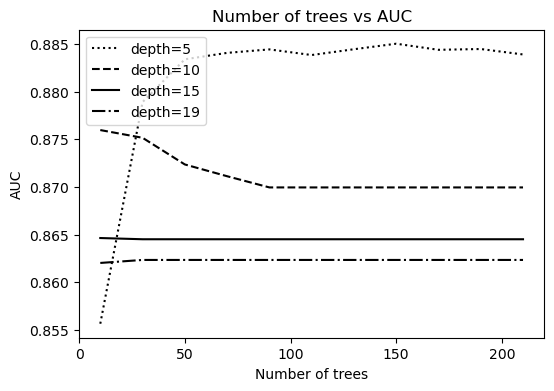

In [51]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 211, 20))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[15], label='depth=15', color='black', linestyle='solid')
plt.plot(num_trees, all_aucs[19], label='depth=19', color='black', linestyle='dashdot')
#plt.plot(num_trees, all_aucs[13], label='depth=13', color='black', linestyle='-.')

    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')


plt.show()

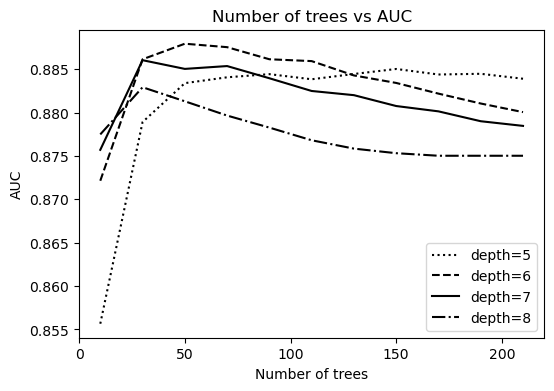

In [53]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 211, 20))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[6], label='depth=6', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[7], label='depth=7', color='black', linestyle='solid')
plt.plot(num_trees, all_aucs[8], label='depth=8', color='black', linestyle='dashdot')
#plt.plot(num_trees, all_aucs[13], label='depth=13', color='black', linestyle='-.')

    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')


plt.show()

##### 6.1.2 Learning rate

In [56]:
train_score, test_score = [], []
lr = np.arange(0.01, 0.81, 0.05)
for lr in lr:
    reg_xgb = XGBRegressor(max_depth=6, random_state=45365745, n_estimators=50, n_jobs=-1,learning_rate=lr)
    reg_xgb.fit(X_train, Y_train)
    train_score.append(reg_xgb.score(X_train, Y_train))
    test_score.append(reg_xgb.score(X_test, Y_test))
    print(f"Score with depth={max_depth} train: {train_score[-1]}, test: {test_score[-1]}")

Score with depth=19 train: 0.5143396859552674, test: 0.5081226351026185
Score with depth=19 train: 0.8903605935648784, test: 0.8748405541053358
Score with depth=19 train: 0.9107710802063379, test: 0.8875119691462428
Score with depth=19 train: 0.9187447079996596, test: 0.8888368927524498
Score with depth=19 train: 0.9231557396935874, test: 0.8895156400764177
Score with depth=19 train: 0.929080422988994, test: 0.8872868992819275
Score with depth=19 train: 0.9313603111588856, test: 0.8891292487784059
Score with depth=19 train: 0.9344115340355887, test: 0.8875300565304716
Score with depth=19 train: 0.9368307064456388, test: 0.8810738171321111
Score with depth=19 train: 0.9409434444640488, test: 0.8765120846450515
Score with depth=19 train: 0.9414139957003228, test: 0.8747502995921563
Score with depth=19 train: 0.9425550648730571, test: 0.8740757792267111
Score with depth=19 train: 0.9450748148472418, test: 0.8700988600622475
Score with depth=19 train: 0.9467452811502864, test: 0.8630194467

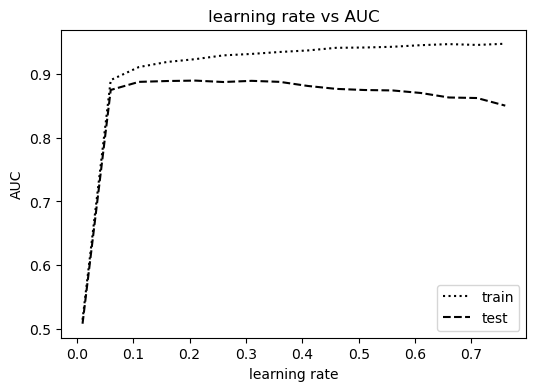

In [64]:
plt.figure(figsize=(6, 4))

plt.plot(lr[:len(train_score)], train_score, label="train",color='black', linestyle='dotted')
plt.plot(lr[:len(test_score)], test_score, label="test",color='black', linestyle='dashed')
plt.legend()

plt.title('learning rate vs AUC')
plt.xlabel("learning rate")
plt.ylabel("AUC")

plt.show()

6.2 Transforming price only

In [246]:
features2= ['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'lat',
 'long',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

X_t = df[features2]
Y_t = np.log(df['price'])

X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split(X_t, Y_t, test_size=0.2, random_state=42)

reg_xgb = XGBRegressor(max_depth=6, random_state=45365745, n_estimators=50, n_jobs=-1,learning_rate=0.1)
reg_xgb.fit(X_train_t, Y_train_t)
Score = reg_xgb.score(X_test_t, Y_test_t)

print("Score:",Score)

Score: 0.8942412408807537


### 7. Random Forest Regressor

In [27]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg_rf = RandomForestRegressor()

In [28]:
# Create a Random Forest Regressor
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [29]:
# Model prediction on train data
Y_pred = reg_rf.predict(X_test)

In [32]:
print(f"Train score: {reg_rf.score(X_train, Y_train)}, test score: {reg_rf.score(X_test, Y_test)}")
print('Rmse:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Train score: 0.9798473132948471, test score: 0.877919821292365
RMSE: 0.008291943723987524


#### 7.1 Hyperparameter tunning


##### 7.1.1 max_depth

In [34]:
train_score, test_score = [], []
depth = range(3, 30, 1)
for max_depth in depth:
    reg_rf = RandomForestRegressor(max_depth=max_depth, random_state=45365745, n_estimators=100, n_jobs=-1)
    reg_rf.fit(X_train, Y_train)
    train_score.append(reg_rf.score(X_train, Y_train))
    test_score.append(reg_rf.score(X_test, Y_test))
    print(f"Score with depth={max_depth} train: {train_score[-1]}, test: {test_score[-1]}")

Score with depth=3 train: 0.697108729197077, test: 0.6850874072094619
Score with depth=4 train: 0.7519937558695872, test: 0.7410552166096922
Score with depth=5 train: 0.7944165396667613, test: 0.7867926671495312
Score with depth=6 train: 0.8286502500233666, test: 0.8173607831434663
Score with depth=7 train: 0.8560797474000948, test: 0.83798589551357
Score with depth=8 train: 0.8789227527474781, test: 0.8528365271922507
Score with depth=9 train: 0.8981919280507427, test: 0.8630768846549935
Score with depth=10 train: 0.9149912785735591, test: 0.8699149175960377
Score with depth=11 train: 0.9295017095279791, test: 0.8744139919159757
Score with depth=12 train: 0.9415998470425473, test: 0.8773287369386881
Score with depth=13 train: 0.9514563640389674, test: 0.8788917031414837
Score with depth=14 train: 0.9593615463590688, test: 0.8793690994279679
Score with depth=15 train: 0.9654031905541866, test: 0.8797192163505145
Score with depth=16 train: 0.9699167570308735, test: 0.879668316242997
Sco

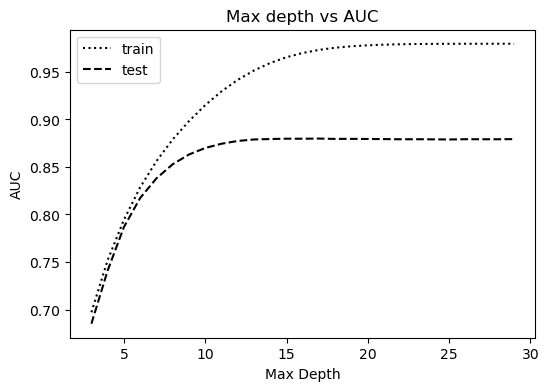

In [35]:
plt.figure(figsize=(6, 4))

plt.plot(depth[:len(train_score)], train_score, label="train",color='black', linestyle='dotted')
plt.plot(depth[:len(test_score)], test_score, label="test",color='black', linestyle='dashed')
plt.legend()

plt.title('Max depth vs AUC')
plt.xlabel("Max Depth")
plt.ylabel("AUC")

plt.show()

##### 7.1.2  max_depth & n_estimators

In [36]:
train_score, test_score = [], []
all_aucs = {}

for max_depth in range(9,13,1):
    print(f"depth:{max_depth}")

    test_scores_graph = []

    for i in range(10, 201, 10):
        reg_rf = RandomForestRegressor(max_depth=max_depth, random_state=45365745, n_estimators=i, n_jobs=-1)
        reg_rf.fit(X_train, Y_train)
        train_score.append(reg_rf.score(X_train, Y_train))
        test_score.append(reg_rf.score(X_test, Y_test))
        test_scores_graph.append(reg_rf.score(X_test, Y_test))
        print(f"Score with n_estimator={i} train: {train_score[-1]}, test: {test_score[-1]}")
    
    all_aucs[max_depth] = test_scores_graph
    print()
    

depth:9
Score with n_estimator=10 train: 0.8937677937846404, test: 0.8581685269873157
Score with n_estimator=20 train: 0.8961175996514489, test: 0.8611903640981204
Score with n_estimator=30 train: 0.8972989187814028, test: 0.8631192095115149
Score with n_estimator=40 train: 0.8975128678760509, test: 0.8630223560827707
Score with n_estimator=50 train: 0.8978467374982917, test: 0.8636654646703295
Score with n_estimator=60 train: 0.8978842121536643, test: 0.8634559676428923
Score with n_estimator=70 train: 0.897952874162218, test: 0.8633689425246458
Score with n_estimator=80 train: 0.898078119953687, test: 0.8631587289564997
Score with n_estimator=90 train: 0.8982163422471776, test: 0.8631014369145762
Score with n_estimator=100 train: 0.8981919280507427, test: 0.8630768846549937
Score with n_estimator=110 train: 0.8983341231282889, test: 0.8633627897403768
Score with n_estimator=120 train: 0.8983064769529965, test: 0.8633562547662099
Score with n_estimator=130 train: 0.8982495536549334, t

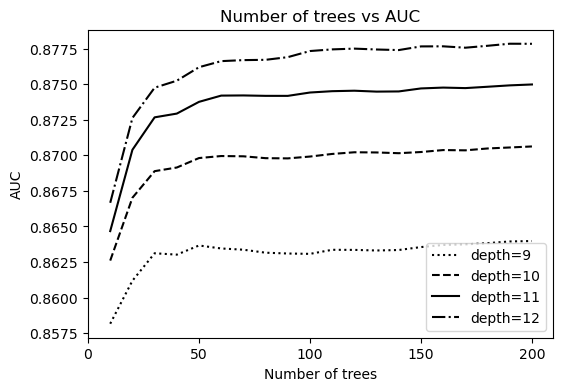

In [38]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[9], label='depth=9', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[11], label='depth=11', color='black', linestyle='solid')
plt.plot(num_trees, all_aucs[12], label='depth=12', color='black', linestyle='dashdot')
#plt.plot(num_trees, all_aucs[13], label='depth=13', color='black', linestyle='-.')

    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')


plt.show()

##### 7.1.3 min_samples_leaf

In [40]:
train_score, test_score = [], []
all_aucs = {}

for min_sam_leaf in [3, 5, 10]:
    print(f"min_samples_leaf:{min_sam_leaf}")
    test_scores_graph = []

    for i in range(10, 201, 10):
        reg_rf = RandomForestRegressor(max_depth=12, random_state=45365745,min_samples_leaf=min_sam_leaf, n_estimators=i, n_jobs=-1)
        reg_rf.fit(X_train, Y_train)
        train_score.append(reg_rf.score(X_train, Y_train))
        test_score.append(reg_rf.score(X_test, Y_test))
        test_scores_graph.append(reg_rf.score(X_test, Y_test))
        print(f"Score with n_estimator={i} train: {train_score[-1]}, test: {test_score[-1]}")
    
    all_aucs[min_sam_leaf] = test_scores_graph
    print()
    

min_samples_leaf:3
Score with n_estimator=10 train: 0.9284167668670891, test: 0.8704473302988628
Score with n_estimator=20 train: 0.9318729908482426, test: 0.8738282831230768
Score with n_estimator=30 train: 0.9331175953239882, test: 0.8755094660335245
Score with n_estimator=40 train: 0.9335883583324475, test: 0.8761997680249167
Score with n_estimator=50 train: 0.9339706204401881, test: 0.8771171566409921
Score with n_estimator=60 train: 0.9341820169995728, test: 0.8772673476258854
Score with n_estimator=70 train: 0.9341825071896992, test: 0.8773916127288724
Score with n_estimator=80 train: 0.9343278059251161, test: 0.8772556931401443
Score with n_estimator=90 train: 0.9342967845532506, test: 0.8772677279499053
Score with n_estimator=100 train: 0.9343164787191596, test: 0.8773787433334371
Score with n_estimator=110 train: 0.9344046263071256, test: 0.877373120992533
Score with n_estimator=120 train: 0.9344767375793462, test: 0.8773510868498379
Score with n_estimator=130 train: 0.9345166

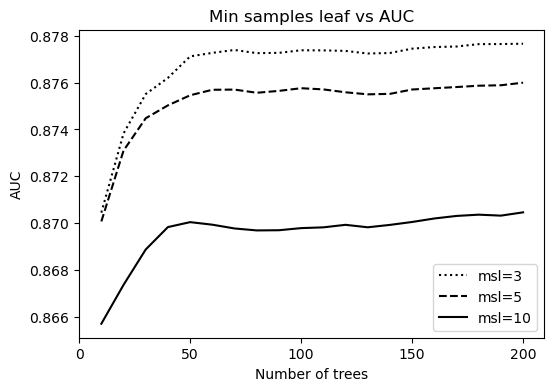

In [41]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[3], label='msl=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='msl=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='msl=10', color='black', linestyle='solid')


    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Min samples leaf vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')


plt.show()

7.2 Transforming price only

In [247]:
reg_rf = RandomForestRegressor(max_depth=12, random_state=45365745, n_estimators=50, n_jobs=-1)
reg_rf.fit(X_train_t, Y_train_t)
Score = reg_rf.score(X_test_t, Y_test_t)

print("Score:",Score)

Score: 0.8836699558988894


### 8. Model Selection

##### 8.1 Linear regresion

In [70]:
from sklearn.metrics import r2_score

In [71]:
### Real variables

lm=LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

print("el valor del score es",r2_score(Y_test,Y_pred))

el valor del R2 es 0.7612388386373332


In [72]:
### Polinomial transformed variables

lm.fit(X_train_pr, Y_train)

Y_pred = lm.predict(X_test_pr)

print("el valor del R2 es",r2_score(Y_test,Y_pred))

el valor del R2 es 0.807552689225628


##### 8.2 Regularized linear regression

In [77]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(X_train, Y_train)
Score = RigeModel.score(X_test, Y_test)

print("el valor del score es",Score)

el valor del score es 0.7291711942950376


In [78]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(X_train_pr, Y_train)
Score = RigeModel.score(X_test_pr, Y_test)

print("el valor del score es",Score)

el valor del score es 0.7959800839069154


##### 8.3 Random Forest

In [214]:
reg_rf = RandomForestRegressor(max_depth=12, random_state=45365745, n_estimators=50, n_jobs=-1)
reg_rf.fit(X_train, Y_train)
Score = reg_rf.score(X_test, Y_test)

print("el valor del score es",Score)

el valor del score es 0.883626987714442


##### 8.4 XG-Boost

In [215]:
reg_xgb = XGBRegressor(max_depth=6, random_state=45365745, n_estimators=50, n_jobs=-1,learning_rate=0.1)
reg_xgb.fit(X_train, Y_train)
Score = reg_xgb.score(X_test, Y_test)

print("Score:",Score)

Score: 0.8952440672016116


### 9. Converting the model for using dictvectorizer

In [127]:
from sklearn.feature_extraction import DictVectorizer
import xgboost

In [217]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 45365745,
}

In [216]:

dv = DictVectorizer(sparse=False)

train_dicts = X_train_t.to_dict(orient='records')
X_train_dv = dv.fit_transform(train_dicts)

test_dicts = X_test_t.to_dict(orient='records')
X_test_dv = dv.transform(test_dicts)

In [218]:
features = dv.get_feature_names_out()
features = [re.sub(r'[\[\]<>]', '', feature) for feature in features]

In [219]:
dtrain = xgboost.DMatrix(X_train_dv, label=Y_train, feature_names=features)
dtest=xgboost.DMatrix(X_test_dv, label=Y_test, feature_names=features)

In [227]:
model_final=xgboost.train(xgb_params, dtrain, num_boost_round=175)
Y_pred = model_final.predict(dtest)
r2_score(Y_test,Y_pred)

0.9033006619870381

### 10. Save Model

In [238]:
import pickle

In [229]:
ouput_file='m_xgb_rg.bin'
with open(ouput_file,'wb') as f_out:
    pickle.dump((dv,model_final),f_out)